In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [21]:
start = '2021-01-01'
end = '2023-12-21'
stock = 'YOLO'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [22]:
data.reset_index(inplace=True)

In [53]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,17.250000,17.690001,17.110001,17.690001,16.558111,344600
1,2021-01-05,17.620001,18.170000,17.620001,18.010000,16.857637,432300
2,2021-01-06,19.150000,19.830000,19.000000,19.049999,17.831093,1360400
3,2021-01-07,20.990000,22.379999,19.260000,19.770000,18.505022,1461600
4,2021-01-08,19.850000,19.900000,19.270000,19.650000,18.392702,662100
...,...,...,...,...,...,...,...
742,2023-12-14,2.900000,2.900000,2.840000,2.895000,2.849934,67100
743,2023-12-15,2.910000,2.929000,2.830000,2.900000,2.854856,30600
744,2023-12-18,2.810000,2.948000,2.810000,2.830000,2.785946,52800
745,2023-12-19,2.850000,2.880000,2.770000,2.860000,2.815479,130200


In [54]:
ma_100_days = data.Close.rolling(100).mean()

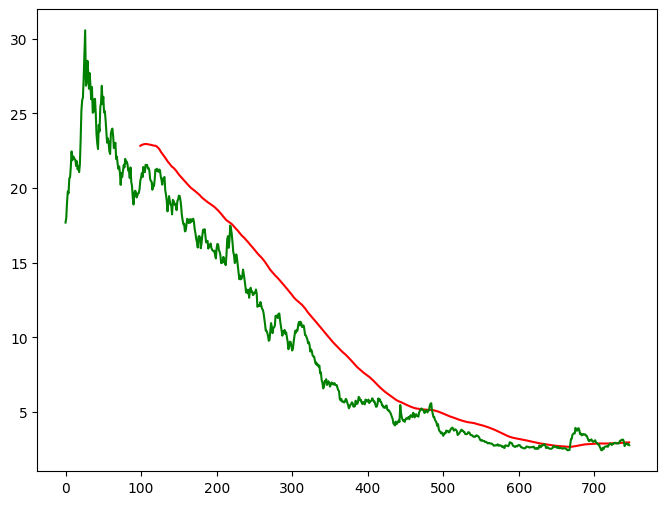

In [55]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [56]:
ma_200_days = data.Close.rolling(200).mean()

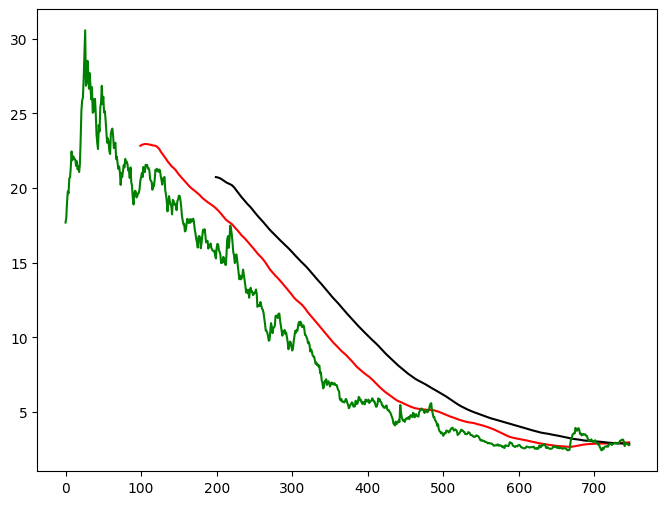

In [57]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'k')
plt.plot(data.Close,'g')
plt.show()

In [58]:
data.dropna(inplace=True)

In [59]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [60]:
data_train.shape[0]

597

In [61]:
data_test.shape[0]

150

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [63]:
data_train_scale = scaler.fit_transform(data_train)

In [64]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [65]:
x, y = np.array(x), np.array(y)

In [66]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [67]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\saite\OneDrive\Desktop\project_main\2_projedct\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [69]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 500ms/step - loss: 0.0851
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 441ms/step - loss: 0.0195
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 410ms/step - loss: 0.0091
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 426ms/step - loss: 0.0056
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 445ms/step - loss: 0.0047
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 409ms/step - loss: 0.0050
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 351ms/step - loss: 0.0037
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 307ms/step - loss: 0.0041
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 343ms/step - loss: 0.0033
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 353ms/step - loss: 0.0039
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 301ms/step - loss: 0.0040
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 289ms/step - loss: 0.0038
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 314ms/step - loss: 0.0039
Epoch 14/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 293ms/step - loss: 0.0040
Epoch 15/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 298ms/step -

In [70]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [71]:
pas_100_days = data_train.tail(100)

In [72]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [73]:
data_test_scale  =  scaler.fit_transform(data_test)

In [74]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [75]:
y_predict = model.predict(x)

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 445ms/step


In [76]:
scale =1/scaler.scale_

In [77]:
y_predict = y_predict*scale

In [78]:
y = y*scale

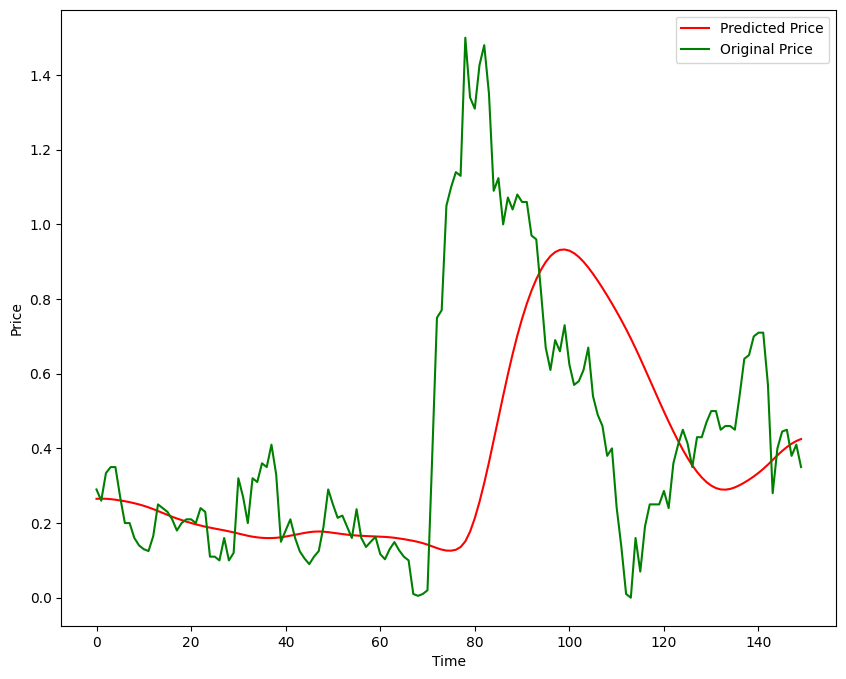

In [79]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [80]:
model.save('Stock Predictions Model.keras')